In [223]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.26.4", 'matplotlib': "3.9.2",'sklearn': "1.5.1", 
                'pandas': "2.2.2",'xgboost': "2.1.1", 'shap': "0.45.1", 
                'plotly': "5.23.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.5

[ OK ] numpy version 1.26.4 is installed.
[ OK ] matplotlib version 3.9.2 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.
[ OK ] xgboost version 2.1.1 is installed.
[ OK ] shap version 0.45.1 is installed.
[ OK ] plotly version 5.23.0 is installed.


In [224]:
import pandas as pd
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("marius2303/ad-click-prediction-dataset")

csv_file_path = os.path.join(path, 'ad_click_dataset.csv') 
df = pd.read_csv(csv_file_path)


df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [225]:
#EDA 
print(df.shape[0], "rows and", df.shape[1], "columns")

10000 rows and 9 columns


In [226]:
# Number of Missing Values to Filled Values Per Column 

missing_dict = {}

for col in df.columns:
   missing_dict[col] = df[col].isna().sum() * 100 / len(df[col])

for feature, percentage in missing_dict.items():
    print(feature, 'is', percentage, '% missing values')



id is 0.0 % missing values
full_name is 0.0 % missing values
age is 47.66 % missing values
gender is 46.93 % missing values
device_type is 20.0 % missing values
ad_position is 20.0 % missing values
browsing_history is 47.82 % missing values
time_of_day is 20.0 % missing values
click is 0.0 % missing values


In [227]:
# remove rows where all of the columns have are NAN except (ID AND FULL NAME) 
na_columns = ['age', 'gender', 'browsing_history', 'device_type', 'ad_position', 'time_of_day']
mask = df[na_columns].isna().all(axis=1)
print("Before filtering:", df.shape)
df_filtered = df[~mask]
print("After filtering:", df_filtered.shape)

Before filtering: (10000, 9)
After filtering: (9993, 9)


In [228]:
df.info

<bound method DataFrame.info of         id full_name   age      gender device_type ad_position  \
0      670   User670  22.0         NaN     Desktop         Top   
1     3044  User3044   NaN        Male     Desktop         Top   
2     5912  User5912  41.0  Non-Binary         NaN        Side   
3     5418  User5418  34.0        Male         NaN         NaN   
4     9452  User9452  39.0  Non-Binary         NaN         NaN   
...    ...       ...   ...         ...         ...         ...   
9995  8510  User8510   NaN         NaN      Mobile         Top   
9996  7843  User7843   NaN      Female     Desktop      Bottom   
9997  3914  User3914   NaN        Male      Mobile        Side   
9998  7924  User7924   NaN         NaN     Desktop         NaN   
9999  3056  User3056  44.0        Male      Tablet         Top   

     browsing_history time_of_day  click  
0            Shopping   Afternoon      1  
1                 NaN         NaN      1  
2           Education       Night      1  
3  

In [229]:
print("Describe: Age", "\n", df["age"].describe())

Describe: Age 
 count    5234.000000
mean       40.197363
std        13.126420
min        18.000000
25%        29.000000
50%        39.500000
75%        52.000000
max        64.000000
Name: age, dtype: float64


In [230]:
clicked_df = df[df["click"]==1].fillna('Missing')
nonclicked_df = df[df["click"]==0].fillna('Missing')

print("Clicked Count =", len(clicked_df), "  Non Clicked Count =", len(nonclicked_df)  )

Clicked Count = 6500   Non Clicked Count = 3500


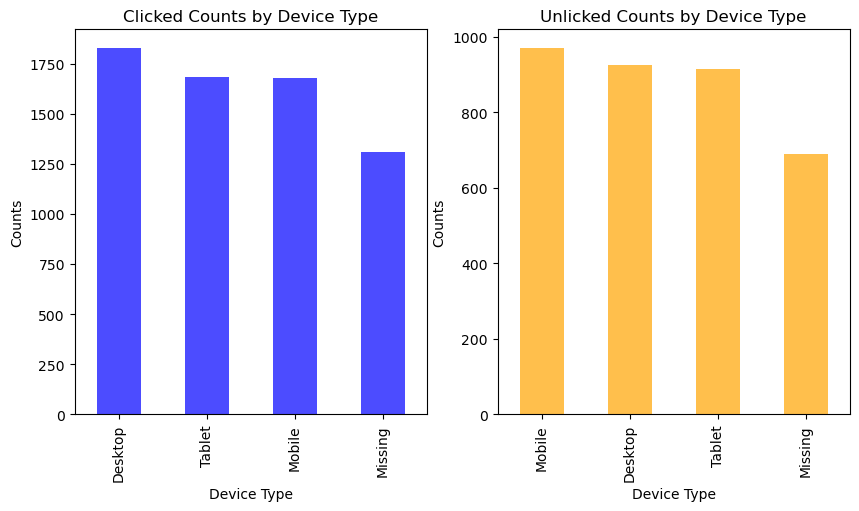

In [231]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

dev_clicked_counts = clicked_df['device_type'].value_counts()
dev_nonclicked_counts = nonclicked_df['device_type'].value_counts()

plt.subplot(1, 2, 1)
dev_clicked_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title("Clicked Counts by Device Type")
plt.xlabel("Device Type") 
plt.ylabel("Counts") 


plt.subplot(1, 2, 2)
dev_nonclicked_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title("Unlicked Counts by Device Type")
plt.xlabel("Device Type") 
plt.ylabel("Counts") 


plt.show()

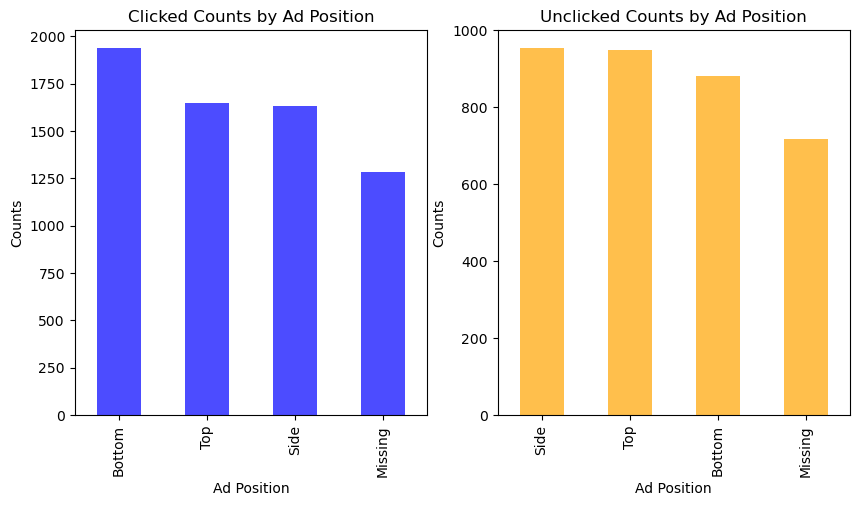

In [232]:
plt.figure(figsize=(10,5))

pos_clicked_counts = clicked_df['ad_position'].value_counts()
pos_nonclicked_counts = nonclicked_df['ad_position'].value_counts()

plt.subplot(1, 2, 1)
pos_clicked_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title("Clicked Counts by Ad Position")
plt.xlabel("Ad Position") 
plt.ylabel("Counts") 


plt.subplot(1, 2, 2)
pos_nonclicked_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title("Unclicked Counts by Ad Position")
plt.xlabel("Ad Position") 
plt.ylabel("Counts") 


plt.show()

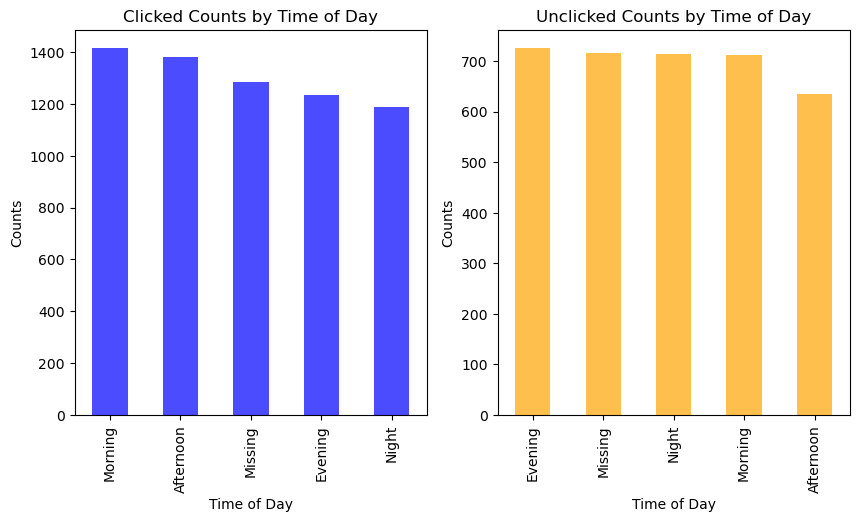

In [233]:
plt.figure(figsize=(10,5))

time_clicked_counts = clicked_df['time_of_day'].value_counts()
time_nonclicked_counts = nonclicked_df['time_of_day'].value_counts()

plt.subplot(1, 2, 1)
time_clicked_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title("Clicked Counts by Time of Day") 
plt.xlabel("Time of Day")  
plt.ylabel("Counts") 

plt.subplot(1, 2, 2)
time_nonclicked_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title("Unclicked Counts by Time of Day")
plt.xlabel("Time of Day") 
plt.ylabel("Counts") 



plt.show()

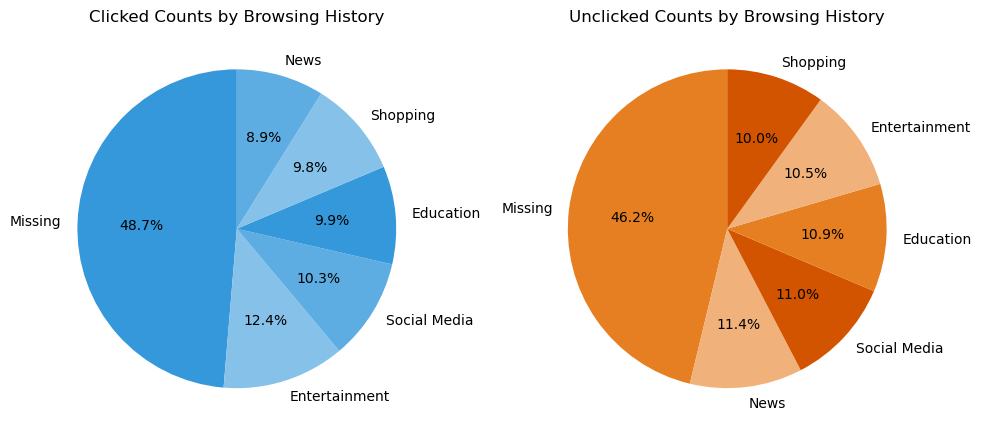

In [252]:
# plt.figure(figsize=(10,5))

brow_clicked_counts = clicked_df['browsing_history'].value_counts()
brow_nonclicked_counts = nonclicked_df['browsing_history'].value_counts()

# plt.subplot(1, 2, 1)
# brow_clicked_counts.plot(kind='bar', color='blue', alpha=0.7)
# plt.title("Clicked Counts by Browsing History")
# plt.xlabel("Browsing History") 
# plt.ylabel("Counts") 


# plt.subplot(1, 2, 2)
# brow_nonclicked_counts.plot(kind='bar', color='orange', alpha=0.7)
# plt.title("Unclicked Counts by Browsing History")
# plt.xlabel("Browsing History") 
# plt.ylabel("Counts") 
# plt.show()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
brow_clicked_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#3498db', '#85c1e9', '#5dade2'], startangle=90)
plt.title("Clicked Counts by Browsing History")
plt.ylabel('') 

# Unclicked browsing history pie chart
plt.subplot(1, 2, 2)
brow_nonclicked_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#e67e22', '#f0b27a', '#d35400'], startangle=90)
plt.title("Unclicked Counts by Browsing History")
plt.ylabel('')  # Removing the ylabel for better pie chart visualization

plt.tight_layout()
plt.show()

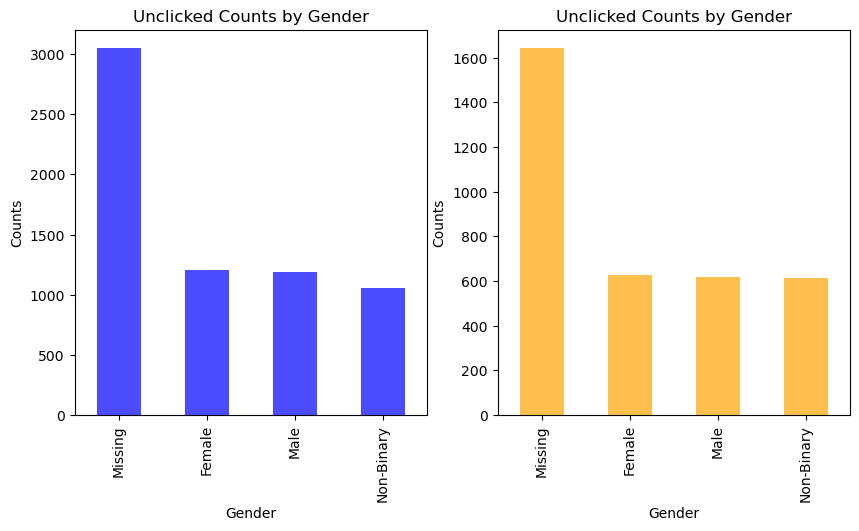

In [235]:
plt.figure(figsize=(10,5))

gen_clicked_counts = clicked_df['gender'].value_counts()
gen_nonclicked_counts = nonclicked_df['gender'].value_counts()

plt.subplot(1, 2, 1)
gen_clicked_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title("Unclicked Counts by Gender")
plt.xlabel("Gender") 
plt.ylabel("Counts") 

plt.subplot(1, 2, 2)
gen_nonclicked_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title("Unclicked Counts by Gender")
plt.xlabel("Gender") 
plt.ylabel("Counts") 

plt.show()

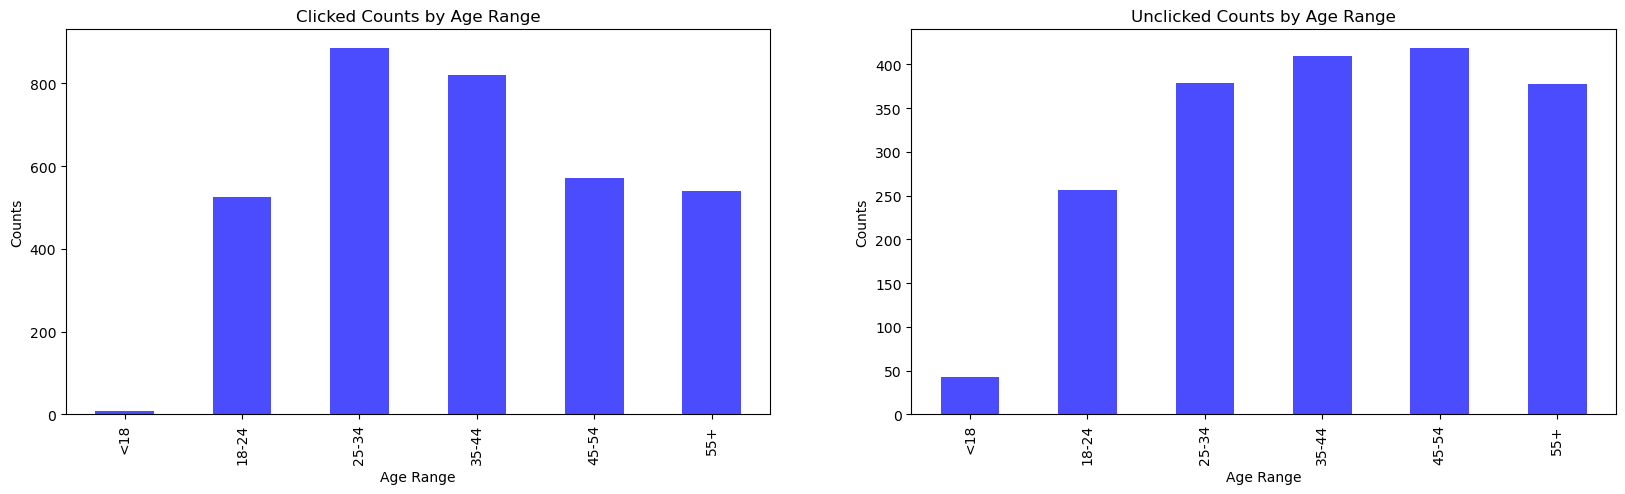

In [236]:
bins = [0, 18, 25, 35, 45, 55, 65] 
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55+']

plt.figure(figsize=(20,5))

age_clicked = pd.cut(clicked_df[clicked_df['age'] != 'Missing']['age'], bins=bins, labels=labels, include_lowest=True)
age_nonclicked = pd.cut(nonclicked_df[nonclicked_df['age'] != 'Missing']['age'], bins=bins, labels=labels, include_lowest=True)

plt.subplot(1, 2, 1)
age_clicked.value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.7)
plt.title("Clicked Counts by Age Range")
plt.xlabel("Age Range") 
plt.ylabel("Counts") 


plt.subplot(1, 2, 2)
age_nonclicked.value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.7)
plt.title("Unclicked Counts by Age Range")
plt.xlabel("Age Range") 
plt.ylabel("Counts") 


plt.show()

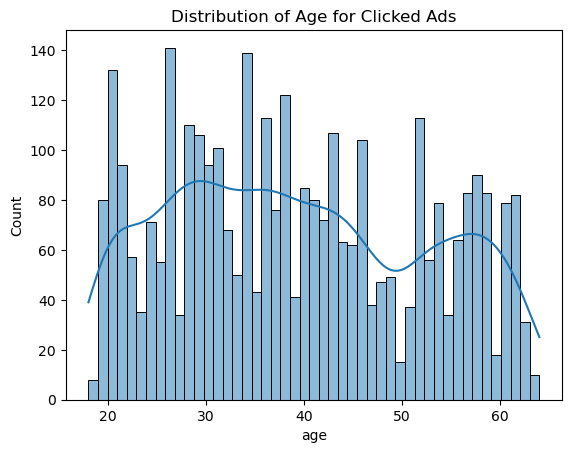

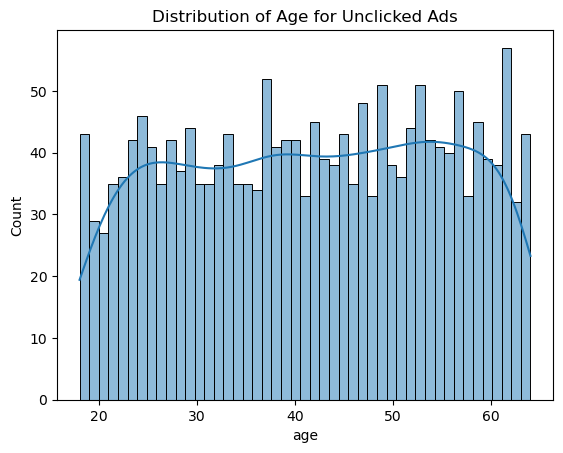

In [237]:
clicked = clicked_df[clicked_df['age'] != 'Missing']['age']
unclicked = nonclicked_df[nonclicked_df['age'] != 'Missing']['age']

sns.histplot(clicked, bins=clicked.nunique(), kde=True)
plt.title('Distribution of Age for Clicked Ads')
plt.show()


sns.histplot(unclicked, bins=unclicked.nunique(), kde=True)
plt.title('Distribution of Age for Unclicked Ads')
plt.show()

In [248]:
from sklearn.model_selection import StratifiedKFold
import numpy as np



X = df_filtered.drop("click", axis=1)
y = df_filtered["click"]

random_state = 42
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]


In [249]:
#Preprocessing 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split


enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

onehot_ftrs = ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']
minmax_ftrs = ['age']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs)])

pip = Pipeline(steps=[('preprocessor', preprocessor)]) 
X_train_prep = pip.fit_transform(X_train)
X_test_prep = pip.transform(X_test)
X_val_prep = pip.transform(X_val)

X_train_tf = pd.DataFrame(X_train_prep, columns=preprocessor.get_feature_names_out())
X_val_tf = pd.DataFrame(X_val_prep, columns=preprocessor.get_feature_names_out())
X_test_tf = pd.DataFrame(X_test_prep, columns=preprocessor.get_feature_names_out())


tfs = [X_train_tf, X_val_tf, X_test_tf]

for t in tfs: 
    t.columns = t.columns.str.replace('onehot__', '')
    t.columns = t.columns.str.replace('device_type_', 'DT-')
    t.columns = t.columns.str.replace('gender_', 'G-')
    t.columns = t.columns.str.replace('time_of_day_', 'TOD-')
    t.columns = t.columns.str.replace('ad_position_', 'AP-')
    t.columns = t.columns.str.replace('browsing_history_', 'BH-')
    print(t.shape)

(5996, 24)
(1998, 24)
(1999, 24)
